Inspect the data set with Pandas

In [1]:
import pandas as pd
colnames=["c0_Number of times pregnant", "c1_Plasma glucose concentration", "c2_Diastolic blood pressure", "c3_Triceps skin fold thickness", "c4_2-Hour serum insulin", "c5_Body mass index", "c6_Diabetes pedigree function", "c7_Age", "c8_Class variable"] 
df = pd.read_csv("pima-indians-diabetes-data.csv", names = ["c0", "c1","c2", "c3", "c4", "c5", "c6", "c7", "c8"], header = None)
print(df.head(30))

    c0   c1  c2  c3   c4    c5     c6  c7  c8
0    6  148  72  35    0  33.6  0.627  50   1
1    1   85  66  29    0  26.6  0.351  31   0
2    8  183  64   0    0  23.3  0.672  32   1
3    1   89  66  23   94  28.1  0.167  21   0
4    0  137  40  35  168  43.1  2.288  33   1
5    5  116  74   0    0  25.6  0.201  30   0
6    3   78  50  32   88  31.0  0.248  26   1
7   10  115   0   0    0  35.3  0.134  29   0
8    2  197  70  45  543  30.5  0.158  53   1
9    8  125  96   0    0   0.0  0.232  54   1
10   4  110  92   0    0  37.6  0.191  30   0
11  10  168  74   0    0  38.0  0.537  34   1
12  10  139  80   0    0  27.1  1.441  57   0
13   1  189  60  23  846  30.1  0.398  59   1
14   5  166  72  19  175  25.8  0.587  51   1
15   7  100   0   0    0  30.0  0.484  32   1
16   0  118  84  47  230  45.8  0.551  31   1
17   7  107  74   0    0  29.6  0.254  31   1
18   1  103  30  38   83  43.3  0.183  33   0
19   1  115  70  30   96  34.6  0.529  32   1
20   3  126  88  41  235  39.3  0.

The data set contains 768 records. By examining the data, it becomes evident that zeros have been used to replace missing values. The case of column 0 (pregnancies) is ambiguous. I check the amount of missing values in the data set by counting the zeros (percentage)in each column and storing it in a python dictionary.

In [2]:
import pprint

lst = df.isin([0]).sum()
lst_perc = []
for x in lst:
    perc = (x/768)*100
    round_perc = round(perc, 2)
    lst_perc.append(round_perc)

dict_missing_val = dict(zip(colnames, lst_perc))
print("The percentage of 0 values in each column is:")
pprint.pprint(dict_missing_val)

The percentage of 0 values in each column is:
{'c0_Number of times pregnant': 14.45,
 'c1_Plasma glucose concentration': 0.65,
 'c2_Diastolic blood pressure': 4.56,
 'c3_Triceps skin fold thickness': 29.56,
 'c4_2-Hour serum insulin': 48.7,
 'c5_Body mass index': 1.43,
 'c6_Diabetes pedigree function': 0.0,
 'c7_Age': 0.0,
 'c8_Class variable': 65.1}


A few of the variables examined have a consistent amount of missing values (e.g. c3, c4). Therefore, I will drop the corresponding columns and examine only the dataframe columns, whose non zero values are more than 90%. Columns dropped are: c0, c3, c4. The percentage in c8 is, of course, not indicative of missing values, but helpful as an indication that in the data set there is an imbalance between the diabetic class and the non-diabetic class. Roughly data on non-diabetic patients are three times more abundant than data on diabetic patients (65.1% vs 34.9%).

In [3]:
df_clean = df.drop(["c0", "c3", "c4"], axis=1)
print(df_clean)
df_clean

      c1  c2    c5     c6  c7  c8
0    148  72  33.6  0.627  50   1
1     85  66  26.6  0.351  31   0
2    183  64  23.3  0.672  32   1
3     89  66  28.1  0.167  21   0
4    137  40  43.1  2.288  33   1
..   ...  ..   ...    ...  ..  ..
763  101  76  32.9  0.171  63   0
764  122  70  36.8  0.340  27   0
765  121  72  26.2  0.245  30   0
766  126  60  30.1  0.349  47   1
767   93  70  30.4  0.315  23   0

[768 rows x 6 columns]


,c1,c2,c5,c6,c7,c8
0,148,72,33.6,0.627,50,1
1,85,66,26.6,0.351,31,0
2,183,64,23.3,0.672,32,1
3,89,66,28.1,0.167,21,0
4,137,40,43.1,2.288,33,1
...,...,...,...,...,...,...
763,101,76,32.9,0.171,63,0
764,122,70,36.8,0.340,27,0
765,121,72,26.2,0.245,30,0
766,126,60,30.1,0.349,47,1


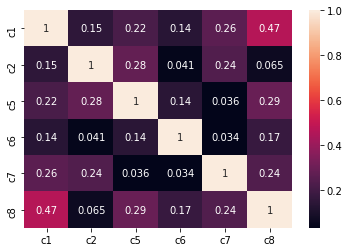

In [4]:
import seaborn as sns

corr = df_clean.corr()
sns.heatmap(corr, annot = True)

The correlation matrix does not suggest that variables are strongly correlated in the cleaned data set. The highest correlation value, 0.47, is found between the 'Plasma glucose concentration' and the diabetic condition. This is not surprising as blood sugar levels are used to diagnose diabetes.

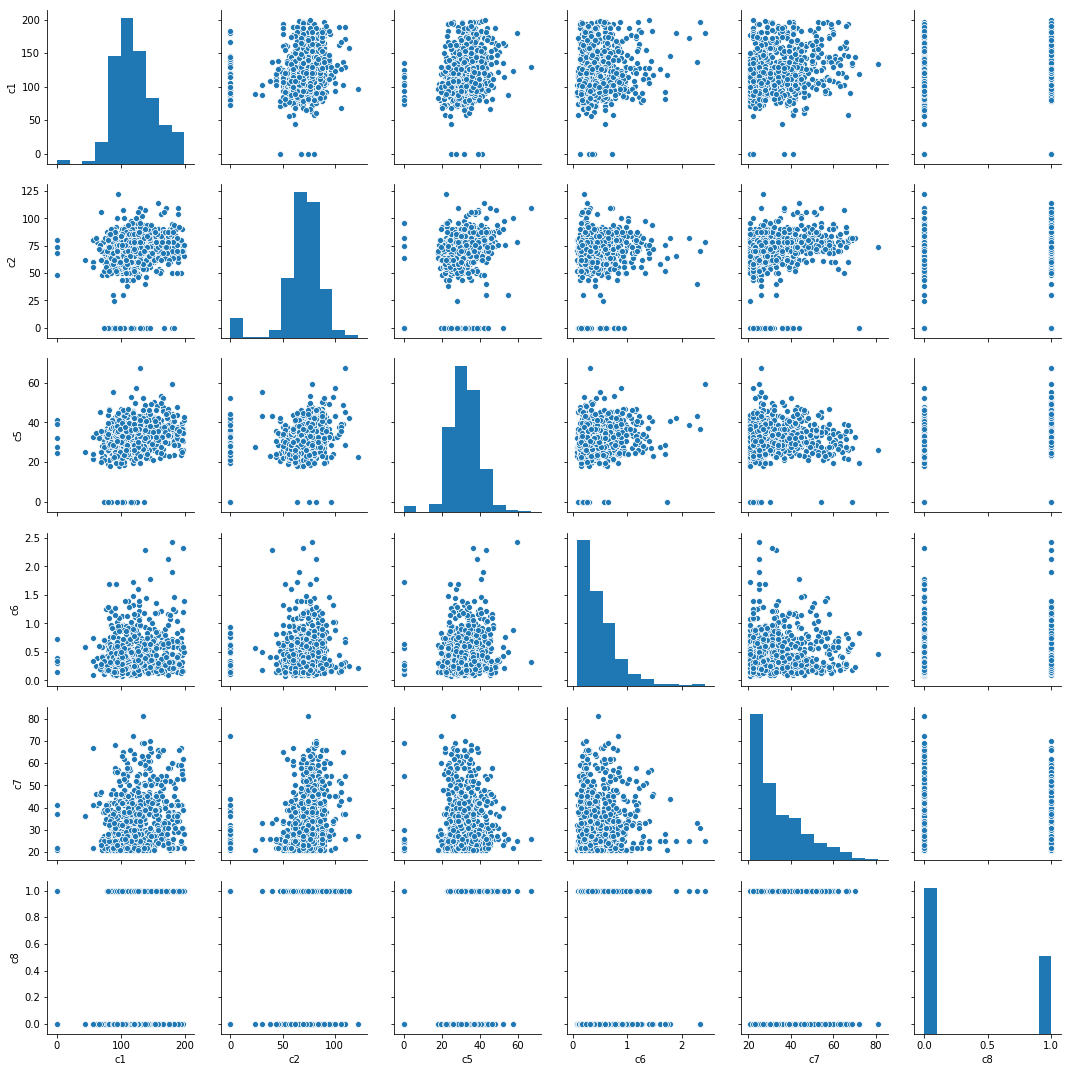

In [5]:
pair = sns.pairplot(df_clean)

A paired plot of all the variables is also not very indicative. The distribution of the data in the two classes (diabetic, not diabetic) is rather uniform, when one considers blood pressure (c2), body mass index (c5), diabetes pedigree function (c6) and age (c7).

Given the data, I will fit a Keras model with the same parameters of the tutorial model, but using only data from the cleaned dataframe and using class weights to make up for the differences in the amount of diabetic and non diabetic data available. First of all, I transform the dataframe in a numpy array and define input and output as before.

In [6]:
dataset = df_clean.to_numpy()
X = dataset[:,0:5] #input
Y = dataset[:,5] #output
print(X)
print(Y)

[[148.     72.     33.6     0.627  50.   ]
 [ 85.     66.     26.6     0.351  31.   ]
 [183.     64.     23.3     0.672  32.   ]
 ...
 [121.     72.     26.2     0.245  30.   ]
 [126.     60.     30.1     0.349  47.   ]
 [ 93.     70.     30.4     0.315  23.   ]]
[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0.

I now define the Keras model similarly to what suggested by the tutorial, but I will split the cleaned data set in a training and testing component (80%; 20%) to check how the model performs on data on which it has not been trained.

In [7]:
import numpy as np

from sklearn.model_selection import train_test_split
seed = 7
np.random.seed(seed)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend, layers, models

# define the keras model
model = tf.keras.Sequential()
model.add(layers.Dense(12, input_dim=5, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/Users/giudittaparolini/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/giudittaparolini/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/giudittaparolini/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/giudittaparolini/anaconda3/lib/python3.7/s

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
model.fit(X_train, Y_train, epochs=150, batch_size=10, class_weight = {0:1 , 1:3})

Instructions for updating:
Use tf.cast instead.
Epoch 1/150
614/614 [==============================] - 0s 450us/sample - loss: 1.0264 - acc: 0.3795
Epoch 2/150
614/614 [==============================] - 0s 131us/sample - loss: 0.6365 - acc: 0.5098
Epoch 3/150
614/614 [==============================] - 0s 127us/sample - loss: 0.6351 - acc: 0.5668
Epoch 4/150
614/614 [==============================] - 0s 127us/sample - loss: 0.6349 - acc: 0.5570
Epoch 5/150
614/614 [==============================] - 0s 130us/sample - loss: 0.6166 - acc: 0.5798
Epoch 6/150
614/614 [==============================] - 0s 125us/sample - loss: 0.6195 - acc: 0.5961
Epoch 7/150
614/614 [==============================] - 0s 127us/sample - loss: 0.6105 - acc: 0.5700
Epoch 8/150
614/614 [==============================] - 0s 130us/sample - loss: 0.6116 - acc: 0.5668
Epoch 9/150
614/614 [==============================] - 0s 129us/sample - loss: 0.6415 - acc: 0.5879
Epoch 10/150
614/614 [==============================

614/614 [==============================] - 0s 121us/sample - loss: 0.5499 - acc: 0.6221
Epoch 80/150
614/614 [==============================] - 0s 115us/sample - loss: 0.5515 - acc: 0.6401
Epoch 81/150
614/614 [==============================] - 0s 115us/sample - loss: 0.5465 - acc: 0.6368
Epoch 82/150
614/614 [==============================] - 0s 120us/sample - loss: 0.5490 - acc: 0.6482
Epoch 83/150
614/614 [==============================] - 0s 119us/sample - loss: 0.5468 - acc: 0.6694
Epoch 84/150
614/614 [==============================] - 0s 126us/sample - loss: 0.5503 - acc: 0.6645
Epoch 85/150
614/614 [==============================] - 0s 125us/sample - loss: 0.5447 - acc: 0.6645
Epoch 86/150
614/614 [==============================] - 0s 124us/sample - loss: 0.5536 - acc: 0.6515
Epoch 87/150
614/614 [==============================] - 0s 123us/sample - loss: 0.5459 - acc: 0.6743
Epoch 88/150
614/614 [==============================] - 0s 122us/sample - loss: 0.5572 - acc: 0.6303
Epo

In [11]:
_, accuracy = model.evaluate(X_train, Y_train)
print('Accuracy: %.2f' % (accuracy*100))

614/614 [==============================] - 0s 97us/sample - loss: 0.5184 - acc: 0.7378
Accuracy: 73.78


In [12]:
predictions = model.predict_classes(X_test)
dim = X_test.shape[0]
print ("Test sample size:", dim)

wrong = 0
for i in range(dim):
    if predictions[i] != Y_test[i]:
        wrong += 1
percent = ((wrong/dim)*100)
percent_rounded = round(percent, 3)
print("The total number of wrong predictions is:", wrong)
print("In percentage this is", percent_rounded, "percent")

false_positive = 0
for i in range (dim):
    if predictions[i] == 1 and Y_test[i] == 0:
        false_positive += 1
print ("The number of false positives is:", false_positive)
    
false_negative = 0
for i in range (dim):
    if predictions[i] == 0 and Y_test[i] == 1:
        false_negative += 1
print ("The number of false negatives is:", false_negative)

print("----")

for i in range(dim):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], Y[i]))

Test sample size: 154
The total number of wrong predictions is: 30
In percentage this is 19.481 percent
The number of false positives is: 8
The number of false negatives is: 22
----
[148.0, 72.0, 33.6, 0.627, 50.0] => 0 (expected 1)
[85.0, 66.0, 26.6, 0.35100000000000003, 31.0] => 1 (expected 0)
[183.0, 64.0, 23.3, 0.672, 32.0] => 0 (expected 1)
[89.0, 66.0, 28.1, 0.16699999999999998, 21.0] => 0 (expected 0)
[137.0, 40.0, 43.1, 2.2880000000000003, 33.0] => 1 (expected 1)
[116.0, 74.0, 25.6, 0.201, 30.0] => 1 (expected 0)
[78.0, 50.0, 31.0, 0.248, 26.0] => 0 (expected 1)
[115.0, 0.0, 35.3, 0.134, 29.0] => 0 (expected 0)
[197.0, 70.0, 30.5, 0.158, 53.0] => 1 (expected 1)
[125.0, 96.0, 0.0, 0.23199999999999998, 54.0] => 0 (expected 1)
[110.0, 92.0, 37.6, 0.191, 30.0] => 1 (expected 0)
[168.0, 74.0, 38.0, 0.537, 34.0] => 0 (expected 1)
[139.0, 80.0, 27.1, 1.4409999999999998, 57.0] => 0 (expected 0)
[189.0, 60.0, 30.1, 0.39799999999999996, 59.0] => 1 (expected 1)
[166.0, 72.0, 25.8, 0.58700

By ignoring the columns with too many missing data and splitting the data set in a testing and a training component the results are not significantly better than the one obtained with the full data set. But, by adding the weight class, the number of false negatives becomes comparable with the false positives.

First run
Model accuracy: 76.06
Wrong predictions: 27 (17.532 %)
False positives: 16
False negatives: 11

Second run
Model accuracy: 75.73
Wrong predictions: 27 (17.532 %)
False positives: 7
False negatives: 20

Third run
Accuracy: 76.06
Wrong predictions: 29 (18.831 %)
False positives: 5
False negatives: 24

Fourth run
Accuracy: 76.55
Wrong predictions: 28 (18.182 %)
False positives is: 16
False negatives is: 12

Fifth run
Accuracy: 74.27
Wrong predictions: 35 (22.727 %)
False positives: 13
False negatives: 22


To compare the results of the adjusted model with the model suggested in the tutorial, I also did a retrial with no separation in training and testing set and predictions checked on the whole data set. Except the first trial, it is notable the reduction in the number of false positives generated by the adjusted model.

In [13]:
dimen = X.shape[0]
print(dimen)

768


In [14]:
model.fit(X, Y, epochs=150, batch_size=10, class_weight = {0:1 , 1:3})


Epoch 1/150
768/768 [==============================] - 0s 126us/sample - loss: 0.5529 - acc: 0.6797
Epoch 2/150
768/768 [==============================] - 0s 120us/sample - loss: 0.5208 - acc: 0.6940
Epoch 3/150
768/768 [==============================] - 0s 121us/sample - loss: 0.5209 - acc: 0.6901
Epoch 4/150
768/768 [==============================] - 0s 123us/sample - loss: 0.5244 - acc: 0.6875
Epoch 5/150
768/768 [==============================] - 0s 124us/sample - loss: 0.5137 - acc: 0.6979
Epoch 6/150
768/768 [==============================] - 0s 128us/sample - loss: 0.5311 - acc: 0.6745
Epoch 7/150
768/768 [==============================] - 0s 131us/sample - loss: 0.5215 - acc: 0.6771
Epoch 8/150
768/768 [==============================] - 0s 126us/sample - loss: 0.5141 - acc: 0.6992
Epoch 9/150
768/768 [==============================] - 0s 125us/sample - loss: 0.5251 - acc: 0.6940
Epoch 10/150
768/768 [==============================] - 0s 125us/sample - loss: 0.5387 - acc: 0.6966

768/768 [==============================] - 0s 115us/sample - loss: 0.4862 - acc: 0.7370
Epoch 83/150
768/768 [==============================] - 0s 116us/sample - loss: 0.4944 - acc: 0.7305
Epoch 84/150
768/768 [==============================] - 0s 116us/sample - loss: 0.4795 - acc: 0.7383
Epoch 85/150
768/768 [==============================] - 0s 121us/sample - loss: 0.4985 - acc: 0.7214
Epoch 86/150
768/768 [==============================] - 0s 132us/sample - loss: 0.5050 - acc: 0.7188
Epoch 87/150
768/768 [==============================] - 0s 111us/sample - loss: 0.4928 - acc: 0.7227
Epoch 88/150
768/768 [==============================] - 0s 115us/sample - loss: 0.4992 - acc: 0.7357
Epoch 89/150
768/768 [==============================] - 0s 114us/sample - loss: 0.4902 - acc: 0.7266
Epoch 90/150
768/768 [==============================] - 0s 114us/sample - loss: 0.4976 - acc: 0.7240
Epoch 91/150
768/768 [==============================] - 0s 117us/sample - loss: 0.4933 - acc: 0.7305
Epo

In [15]:
_, accuracy = model.evaluate(X, Y)
print('Accuracy: %.2f' % (accuracy*100))

768/768 [==============================] - 0s 16us/sample - loss: 0.5542 - acc: 0.7331
Accuracy: 73.31


In [16]:
from collections import Counter

predictions = model.predict_classes(X)

wrong = 0
for i in range(768):
    if predictions[i] != Y[i]:
        wrong += 1
percent = ((wrong/768)*100)
percent_rounded = round(percent, 3)
print("The total number of wrong predictions is:", wrong)
print("In percentage this is", percent_rounded, "percent")
        

false_positive = 0
for i in range (768):
    if predictions[i] == 1 and Y[i] == 0:
        false_positive += 1
print ("The number of false positives is:", false_positive)
    
false_negative = 0
for i in range (768):
    if predictions[i] == 0 and Y[i] == 1:
        false_negative += 1
print ("The number of false negatives is:", false_negative)

The total number of wrong predictions is: 205
In percentage this is 26.693 percent
The number of false positives is: 170
The number of false negatives is: 35


First run
Accuracy: 65.23;
Wrong predictions: 267 (34.766%);
False positives: 1;
False negatives: 266


Second run
Accuracy: 70.96;
Wrong predictions: 223 (29.036%);
False positives: 202;
False negatives: 21


Third run
Accuracy: 70.70;
Wrong predictions: 225 (29.297%);
False positives: 187;
False negatives is: 38


Fourth run
Accuracy: 69.66;
Wrong predictions: 233 (30.339%);
False positives: 207;
False negatives: 26


Fifth run
Accuracy: 71.74;
Wrong predictions: 217 (28.255 %);
False positives: 177;
False negatives: 40
